<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [42]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: Math for 4th grade

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [43]:
#pick only the fields we need for this test
df = df[['STATE','YEAR','ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_4_G','AVG_MATH_4_SCORE','AVG_READING_4_SCORE']]
#replace NaN values in the dataframe to zeros(0)
df.fillna(0,inplace=True)


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [44]:
#I have chosen to normalize the values in the two pandas dataframe clumns AVG_MATH_4_SCORE and AVG_READING_4_SCORE

df['AVG_MATH_4_SCORE_NORM']=(df['AVG_MATH_4_SCORE']-df['AVG_MATH_4_SCORE'].mean())/df['AVG_MATH_4_SCORE'].std()
df['AVG_READING_4_SCORE_NORM']=(df['AVG_READING_4_SCORE']-df['AVG_READING_4_SCORE'].mean())/df['AVG_READING_4_SCORE'].std()

In [45]:
#check how the summary stats look like after normalization
df['AVG_MATH_4_SCORE_NORM'].describe()

count    1.715000e+03
mean     9.865772e-16
std      1.000000e+00
min     -6.999229e-01
25%     -6.999229e-01
50%     -6.999229e-01
75%      1.376729e+00
max      1.574505e+00
Name: AVG_MATH_4_SCORE_NORM, dtype: float64

Final feature list: I picked two features - 'AVG_MATH_4_SCORE','AVG_READING_4_SCORE' - and normalized the two fields.

Feature selection justification: The goal is to check if there is a correlation between the average math and reading score and see if we can easily predict the value of one from the other. I will also try to predict the reading score based on the three inputs total expenditure, instruction expenditure and the average math score.

<h2> EDA </h2>

Visualization 1

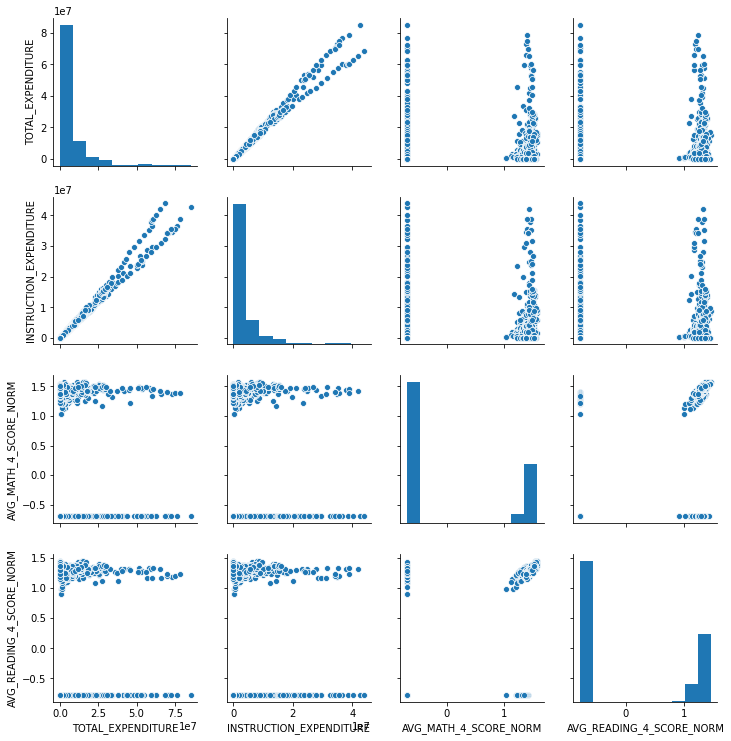

In [46]:
sns.pairplot(df[['TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','AVG_MATH_4_SCORE_NORM','AVG_READING_4_SCORE_NORM']])

Pair wise plotting of TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,AVG_MATH_4_SCORE,AVG_READING_4_SCORE in the input data set.

Visualization 2

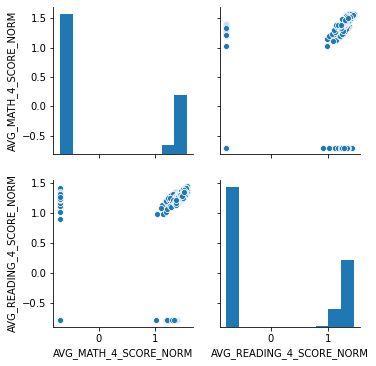

In [47]:
sns.pairplot(df[['AVG_MATH_4_SCORE_NORM','AVG_READING_4_SCORE_NORM']])

Corelation between average math and reading scores of 4th graders. There appears to be a lot of datapoints that are linearly correlated if we leave the outliers (very close to both the x and y axes).

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df[['TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','AVG_MATH_4_SCORE_NORM']]
y = df['AVG_READING_4_SCORE_NORM']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)

<h2> Prediction </h2>

Chosen ML task: Regression

In [51]:
# import your sklearn class here
from sklearn import  linear_model


In [52]:
# create your model here
model = linear_model.LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

In [55]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

In [57]:
X_train.columns

Index(['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'AVG_MATH_4_SCORE_NORM'],
      dtype='object')

Text(0, 0.5, 'Reading score')

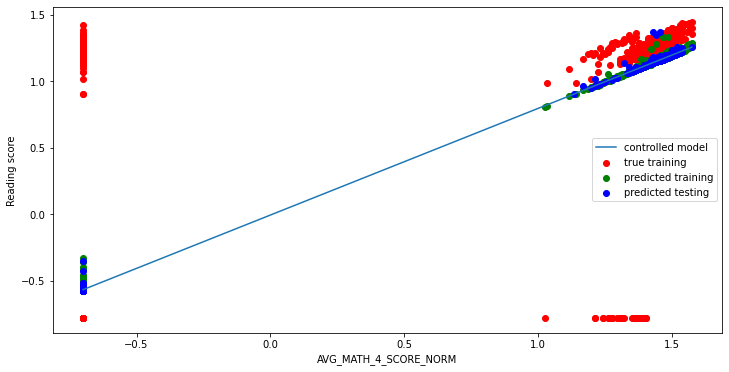

In [59]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG_MATH_4_SCORE_NORM'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading score')

<h2> Summary </h2>

From the graph above, there appears to be a positive co-relation between the two variables average math and reading scores. Also, beyond the few outliers very close to x and y axes, the predicted training and test values appear very close together.